In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from sklearn.datasets import fetch_openml

In [18]:
mnist = fetch_openml('mnist_784')
data = mnist.data
target = mnist.target

print(data.shape, target.shape)

(70000, 784) (70000,)


In [82]:
print('\ntype(mnist): ', type(mnist))
print('\ndata:\n', data[:2])
print('\ntarget:\n', target[:2])


type(mnist):  <class 'sklearn.utils._bunch.Bunch'>

data:
    pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 784 columns]

target:
 0    5
1    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [73]:
feat_cols = ['pixel'+str(i + 1) for i in range(data.shape[1]) ]

data_frame = pd.DataFrame(data, columns=feat_cols)
data_frame['target'] = target
data_frame['label'] = data_frame['target'].apply(lambda i: str(i))

print('Size of the dataframe: {}'.format(data_frame.shape))

Size of the dataframe: (70000, 786)


In [118]:
# print('\ndata:\n', data[:2])
print('\nfeat_cols:\n', feat_cols[:3])
print("\ndata_frame['target']:\n", data_frame['target'][:2])
print('\ndata_frame:\n', data_frame.at[0, 'pixel1'])
print('shape: ', data_frame.shape)


feat_cols:
 ['pixel1', 'pixel2', 'pixel3']

data_frame['target']:
 0    5
1    0
Name: target, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

data_frame:
 0
shape:  (70000, 789)


In [104]:
print('\ndata_frame.columns:\n', data_frame.columns[:2])
print('\ndata_frame.index:\n', data_frame.index)
print('\ndata_frame.columns:\n', data_frame.columns[0])


data_frame.columns:
 Index(['pixel1', 'pixel2'], dtype='object')

data_frame.index:
 RangeIndex(start=0, stop=70000, step=1)

data_frame.columns:
 pixel1


In [105]:
# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(data_frame.shape[0])

<Figure size 640x480 with 0 Axes>

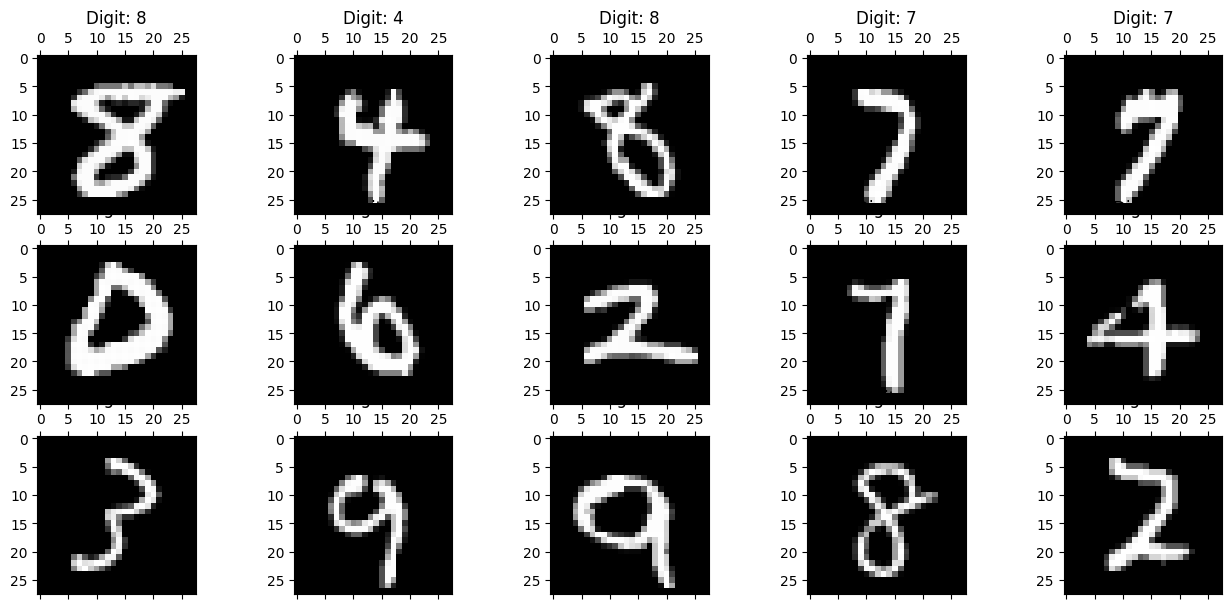

In [106]:
plt.gray()
fig = plt.figure(figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1, title="Digit: {}".format(str(data_frame.loc[rndperm[i],'label'])) )
    ax.matshow(data_frame.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    
plt.show()

In [107]:
pca = PCA(n_components=3)
values = data_frame[feat_cols].values
pca_result = pca.fit_transform(values)

data_frame['pca-one'] = pca_result[:,0]
data_frame['pca-two'] = pca_result[:,1] 
data_frame['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

c:\Python\Python310\lib\site-packages\sklearn\decomposition\_pca.py:611: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


In [108]:
print('\ndata_frame:\n', data_frame[:2])
print("\ndata_frame['pca-one']:\n", data_frame['pca-one'][:2])


data_frame:
    pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel780  pixel781  pixel782  pixel783  pixel784  target  \
0        0  ...         0         0         0         0         0       5   
1        0  ...         0         0         0         0         0       0   

   label      pca-one     pca-two   pca-three  
0      5   122.255255  316.233844   51.131831  
1      0  1010.494003  289.963621 -576.120745  

[2 rows x 789 columns]

data_frame['pca-one']:
 0     122.255255
1    1010.494003
Name: pca-one, dtype: float64


<Axes: xlabel='pca-one', ylabel='pca-two'>

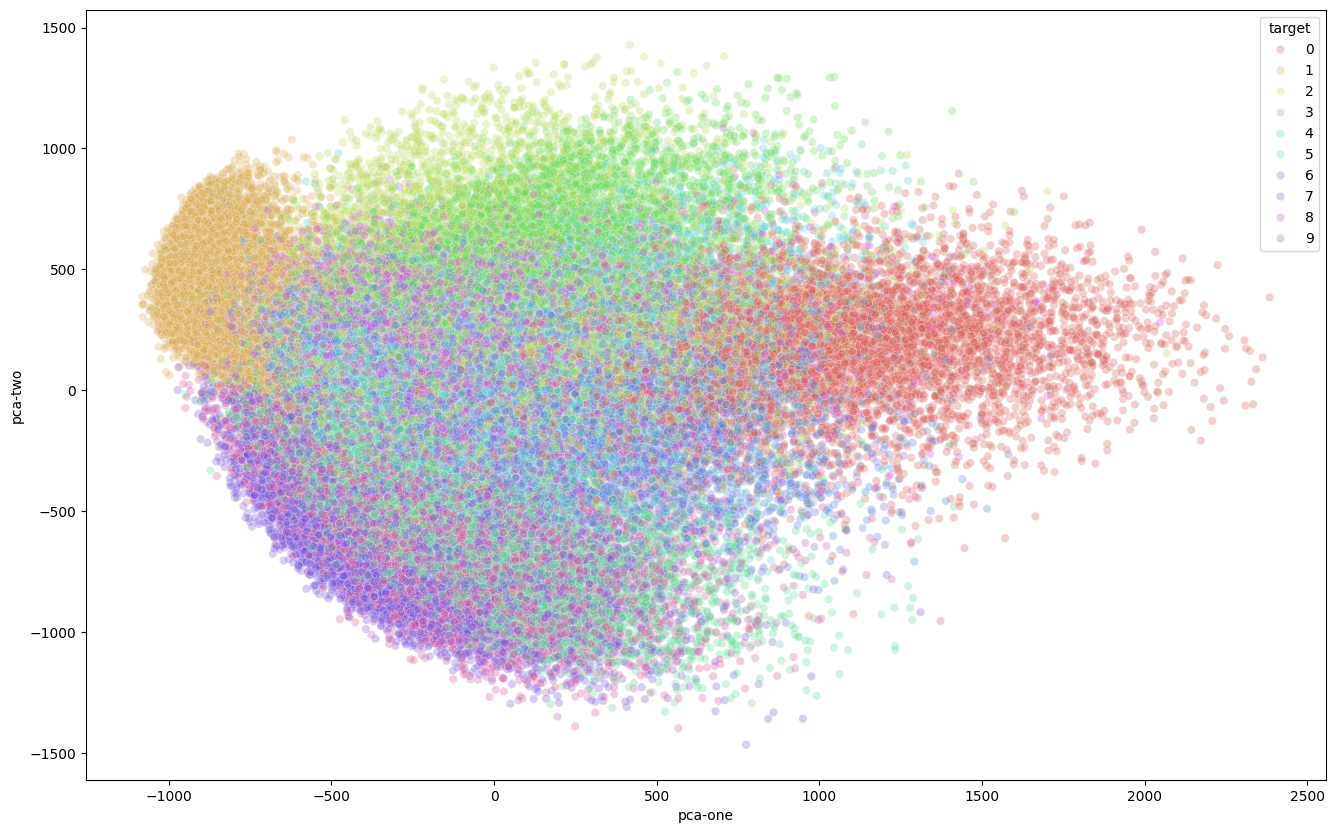

In [112]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    data=data_frame.loc[rndperm,:],
    x="pca-one", 
    y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

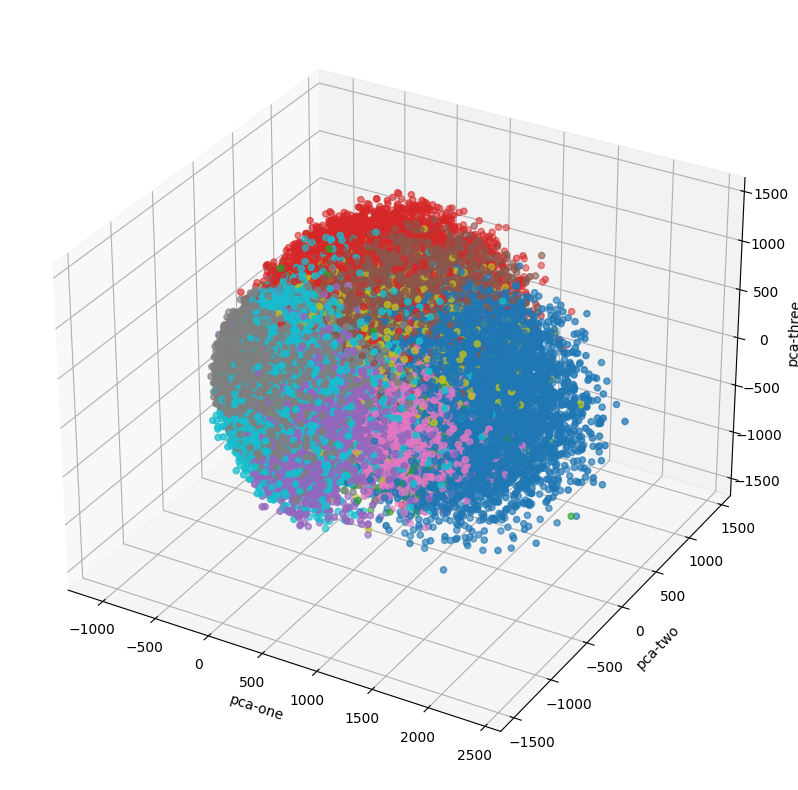

In [113]:
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=data_frame.loc[rndperm,:]["pca-one"], 
    ys=data_frame.loc[rndperm,:]["pca-two"], 
    zs=data_frame.loc[rndperm,:]["pca-three"], 
    c=[int(_) for _ in df.loc[rndperm,:]["target"]],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

How to Plot T-SNE

In [114]:
N = 10000

df_subset = data_frame.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols[1:]].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


c:\Python\Python310\lib\site-packages\sklearn\decomposition\_pca.py:611: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [115]:
print(data_subset[:2])
print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



In [116]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


c:\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.017s...
[t-SNE] Computed neighbors for 10000 samples in 1.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 540.083304
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.847809
[t-SNE] KL divergence after 300 iterations: 2.770852
t-SNE done! Time elapse

In [120]:
tsne_results[:,0]
# tsne_results[:,1]

array([-0.72724617, -0.98989284,  2.5444286 , ...,  0.9126504 ,
        4.7357802 ,  0.03508733], dtype=float32)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

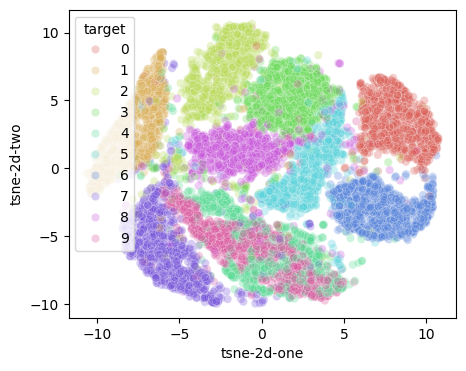

In [121]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(5, 4))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

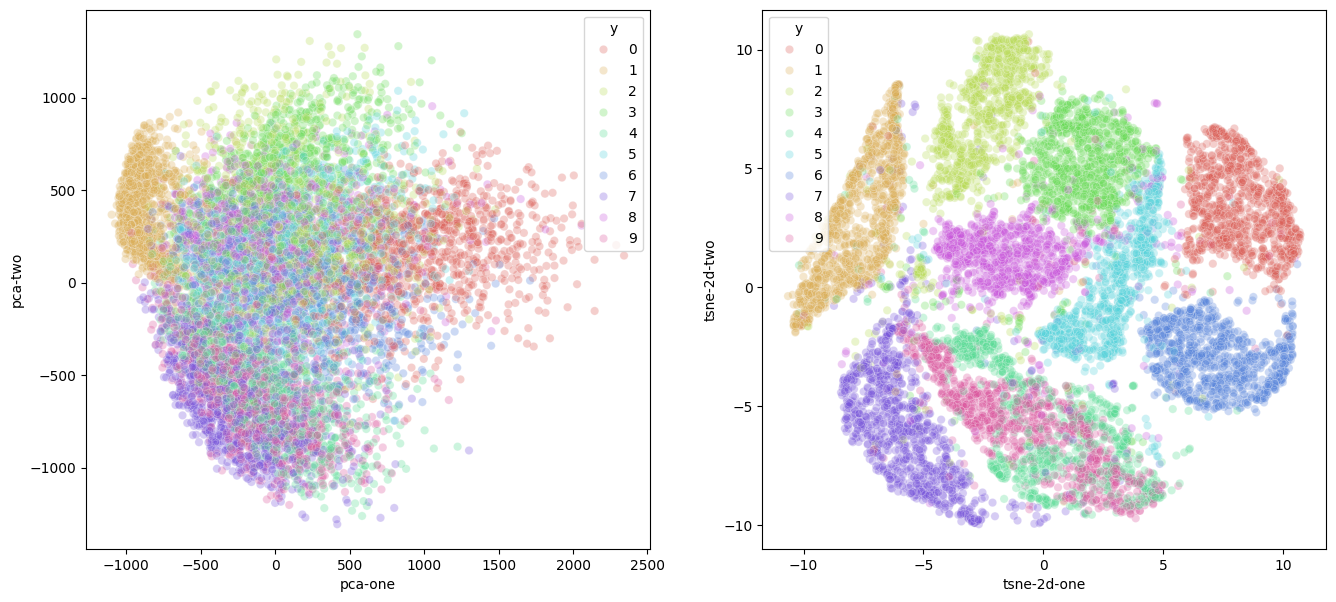

In [97]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)